In [3]:
# MITx 15.071xThe Analytics Edge
# Unit 1 Assignment 1 Exercise 2: Stock dynamics

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [6]:
os.chdir("E:\\eDX - Analytics Edge\\Unit 1\\")

In [7]:
IBM = pd.read_csv("IBMStock.csv")
GE = pd.read_csv("GEStock.csv")
ProcterGamble = pd.read_csv("ProcterGambleStock.csv")
CocaCola = pd.read_csv("CocaColaStock.csv")
Boeing = pd.read_csv("BoeingStock.csv")

In [9]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        480 non-null    object 
 1   StockPrice  480 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [23]:
# convert the dates into a format that Python can understand
IBM["Date"] = pd.to_datetime(IBM.Date, "%m/%d/%y")
GE["Date"] = pd.to_datetime(GE.Date)
ProcterGamble["Date"] = pd.to_datetime(ProcterGamble.Date)
CocaCola["Date"] = pd.to_datetime(CocaCola.Date)
Boeing["Date"] = pd.to_datetime(Boeing.Date)

In [27]:
# Problem 1.1 - Summary Statistics
# Our five datasets all have the same number of observations. How many observations are there in each data set?
len(IBM)

480

In [29]:
# Problem 1.2 - Summary Statistics
# What is the earliest year in our datasets?
IBM.Date.min()

Timestamp('1970-01-01 00:00:00')

In [30]:
# Problem 1.3 - Summary Statistics
# What is the latest year in our datasets?
IBM.Date.max()


Timestamp('2009-12-01 00:00:00')

In [32]:
# Problem 1.4 - Summary Statistics
# What is the mean stock price of IBM over this time period?
IBM.describe()

,StockPrice
count,480.000000
mean,144.375030
std,87.822078
min,43.395000
25%,88.343929
50%,112.114595
75%,165.407284
max,438.901579


In [35]:
# Problem 1.5 - Summary Statistics
# What is the minimum stock price of General Electric (GE) over this time period?
GE.StockPrice.min()

9.293636364

In [36]:
# Problem 1.6 - Summary Statistics
# What is the maximum stock price of Coca-Cola over this time period?
CocaCola.StockPrice.max()

146.58428569999998

In [37]:
# Problem 1.7 - Summary Statistics
#What is the median stock price of Boeing over this time period?
Boeing.StockPrice.median()

44.88339827

In [38]:
# Problem 1.7 - Summary Statistics
# What is the standard deviation of the stock price of Procter & Gamble over this time period?
ProcterGamble.StockPrice.std()

18.19414030797156

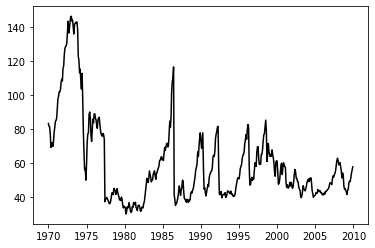

In [50]:
# Problem 2.1 - Visualizing Stock Dynamics
# Using the plot function, plot the Date on the x-axis and the StockPrice on the y-axis, for Coca-Cola.
# Around what year did Coca-Cola has its highest stock price in this time period? 
# Around what year did Coca-Cola has its lowest stock price in this time period?
#CocaCola.plot(x="Date", y="StockPrice", xlabel="Year", ylabel="Stock Price")
plt.plot(CocaCola["Date"], CocaCola["StockPrice"], c='Black')


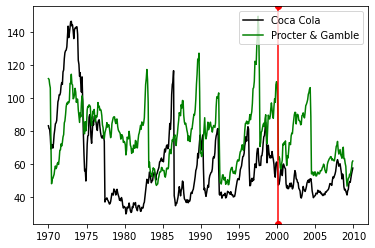

In [61]:
# Problem 2.2 - Visualizing Stock Dynamics
# Add  for Procter & Gamble too on plot so it will show both company Cocaa Cola and Procter & Gamble.
# Question: In March of 2000, the technology bubble burst, and a stock market crash occurred. \
# According to this plot, which company's stock dropped more?
plt.plot(CocaCola["Date"], CocaCola["StockPrice"], c='Black',label="Coca Cola" )
plt.plot(ProcterGamble["Date"], ProcterGamble["StockPrice"], c='Green',label="Procter & Gamble")
plt.axvline(x='2000-03-01', c='Red', marker = "o")
plt.legend(loc="upper right")
plt.show()

In [62]:
# Problem 2.3 - Visualizing Stock Dynamics
# Answer these questions using the plot you generated in the previous problem.
# Question 1 : Around 1983, the stock for one of these companies (Coca-Cola or Procter and Gamble) was going up, \
# while the other was going down. Which one was going up?
# Question 2 : In the time period shown in the plot, which stock generally has lower values?


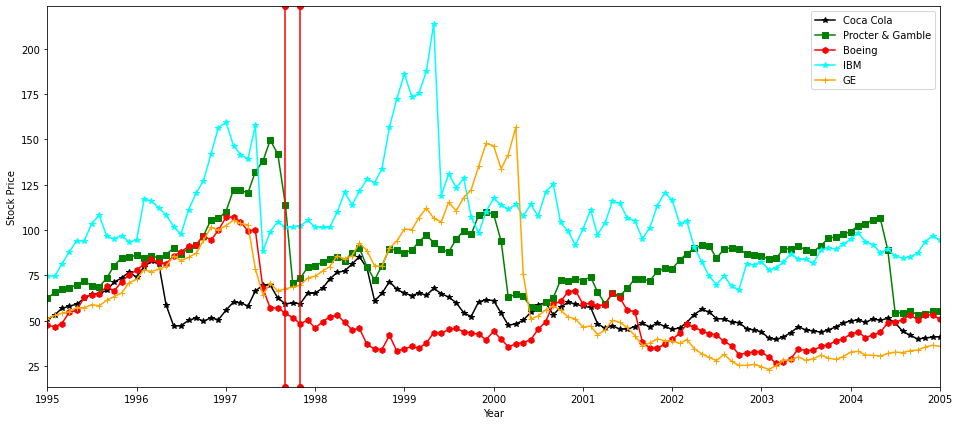

In [95]:
# Problem 3.1 - Visualizing Stock Dynamics 1995-2005
# Plot stock price of all 5 compannies from 1995-2005. Index 300:431 is for year 1995 to 2005. After plotting aanswer below ques.
# Question 1: Which stock fell the most right after the technology bubble burst in March 2000?
# Problem 3.2 - Which stock reaches the highest value in the time period 1995-2005?
# Problem 3.3 - In October of 1997, there was a global stock market crash that was caused by an economic crisis in Asia. \
# Comparing September 1997 to November 1997, which companies saw a decreasing trend in their stock price? \
# (Select all that apply.)
# Problem 3.4 - In the last two years of this time period (2004 and 2005) which stock seems to be performing the best, \
# in terms of increasing stock price?
plt.figure(figsize=(16,7)) 
plt.plot(CocaCola["Date"][300:431], CocaCola["StockPrice"][300:431], c='Black',label="Coca Cola", marker='*' )
plt.plot(ProcterGamble["Date"][300:431], ProcterGamble["StockPrice"][300:431], c='Green',label="Procter & Gamble", marker='s')
plt.plot(Boeing["Date"][300:431], Boeing["StockPrice"][300:431], c='Red',label="Boeing", marker='h')
plt.plot(IBM["Date"][300:431], IBM["StockPrice"][300:431], c='Cyan',label="IBM", marker='*')
plt.plot(GE["Date"][300:431], GE["StockPrice"][300:431], c='Orange',label="GE", marker='+')
plt.legend(loc="upper right")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.xlim(['1995','2005'])
plt.axvline(x='1997-09-01', c='Red', marker = "o")
plt.axvline(x='1997-11-01', c='Red', marker = "o")
plt.show()


In [113]:
# Problem 4.1 - Monthly Trends
# For IBM, compare the monthly averages to the overall average stock price. 
#In which months has IBM historically had a higher stock price (on average)? Select all that apply.

# Average stock price
IBM['StockPrice'].mean()

144.37503030766666

In [117]:
# Average stockprice by month
IBM['StockPrice'].groupby(IBM['Date'].dt.month).mean() 

Date
1     150.238423
2     152.693993
3     152.432690
4     152.116824
5     151.502194
6     139.090676
7     139.067018
8     140.145475
9     139.088527
10    137.346553
11    138.018682
12    140.759310
Name: StockPrice, dtype: float64

In [120]:
# For IBM, compare the monthly averages to the overall average stock price. 
#In which months has IBM historically had a higher stock price (on average)? Select all that apply.
IBM['StockPrice'].groupby(IBM['Date'].dt.month).mean()  > IBM['StockPrice'].mean()

Date
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: StockPrice, dtype: bool

In [132]:
# Problem 4.2 - Monthly Trends
# Repeat above steps of finding monthly average price for other four companies.
# General Electric and Coca-Cola both have their highest average stock price in the same month. Which month is this?

# Problem 4.3 - Monthly Trends
# For the months of December and January, every company's average stock is higher in one month and lower in the other. \
# In which month are the stock prices lower?

GE['StockPrice'].groupby(GE['Date'].dt.month).mean()

Date
1     62.045106
2     62.520805
3     63.150548
4     64.480092
5     60.871351
6     56.468439
7     56.733493
8     56.503149
9     56.239131
10    56.238968
11    57.288795
12    59.102174
Name: StockPrice, dtype: float64

In [133]:
# Boeing
Boeing['StockPrice'].groupby(Boeing['Date'].dt.month).mean() 


Date
1     46.510974
2     46.892233
3     46.882076
4     47.046860
5     48.137160
6     47.385255
7     46.553602
8     46.863107
9     46.304854
10    45.216035
11    45.149903
12    46.173146
Name: StockPrice, dtype: float64

In [134]:
#ProcterGamble
ProcterGamble['StockPrice'].groupby(ProcterGamble['Date'].dt.month).mean() 

Date
1     79.617984
2     79.025755
3     77.347607
4     77.686708
5     77.859578
6     77.392751
7     76.645559
8     76.822663
9     76.623845
10    76.679035
11    78.456104
12    78.296608
Name: StockPrice, dtype: float64

In [129]:
#IBM
CocaCola['StockPrice'].groupby(CocaCola['Date'].dt.month).mean()  

Date
1     60.368487
2     60.734754
3     62.071354
4     62.688882
5     61.443581
6     60.812084
7     58.983460
8     58.880139
9     57.600238
10    57.938868
11    59.102683
12    59.732227
Name: StockPrice, dtype: float64